NameError: name 'values' is not defined

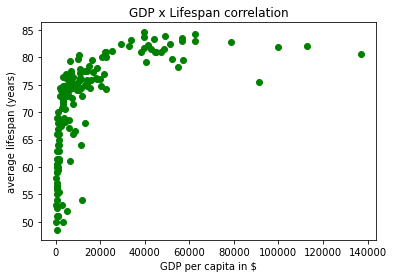

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# ---- Essentials ----

plt.title("GDP x Lifespan correlation")
plt.ylabel("average lifespan (years)") 
plt.xlabel("GDP per capita in $")

nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

perCapita = nations[:,3]/nations[:,6]*1000000
age = nations[:,4]

plt.plot(perCapita, nations[:,4], "og")


# ---- Normalizing ----

def normalizeMinMax(array):
    min = np.amin(values)
    max = np.amax(values)
    
    norm = (norm-min)/(max-min)
    return norm

perCapitaNorm = normalizeMinMax(perCapita)
ageNorm = normalizeMinMax(age)


# ---- Approximation function ----

def rndApprox(xValues):

    x = np.sort(xValues)

    x = np.expand_dims(xValues, axis = 0)
    p = np.expand_dims(np.arange(0,3), axis = 1)
    x2 = np.power(x, p)

    coeffs = np.array([rnd.uniform(0,100),rnd.uniform(-0.00001,0.00001),rnd.uniform(-0.00000001,0.00000001)])
    coeffs = np.expand_dims(coeffs, axis = 1)

    y = np.matmul(x2.transpose(), coeffs) 
    
    return coeffs, y


# ---- RMSE calculation function ----

def getRMSE(y, y1):
    y1 = y1.transpose() # <-- somehow this seems to be nessecary... :/
   
    rmse = np.sqrt(np.mean((y1-y)**2))
    
    return rmse




# ---- MAIN ----

bestResult = rndApprox(perCapitaNorm)

#print(bestResult[1].shape) <-- (163, 1) 
#print(nations[:,4].shape) <-- (163,) vector vs 2D array, but seems to be fine 

for i in range(10000):
    result = rndApprox(perCapitaNorm)
    if getRMSE(ageNorm, result[1]) <  getRMSE(ageNorm, bestResult[1]):
        bestResult = result
     
    
x, y = zip(*sorted(zip(perCapitaNorm, bestResult[1]))) # <-- little trick to sort x-values 
                         # Source: https://stackoverflow.com/questions/37414916/pythons-matplotlib-plotting-in-wrong-order
        
plt.plot(x, y, "r")
plt.show()

print("RMSE: " , getRMSE(ageNorm, bestResult[1]), "\n\nk1: ", bestResult[0][0], "\nk2: ", bestResult[0][1], "\nk3: ", bestResult[0][2])